In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%pip install tensorflow
import tensorflow as tf
from sklearn.preprocessing import OneHotEncoder

  Using cached tensorflow-2.20.0-cp312-cp312-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (4.5 kB)
  Using cached absl_py-2.3.1-py3-none-any.whl.metadata (3.3 kB)
  Using cached astunparse-1.6.3-py2.py3-none-any.whl.metadata (4.4 kB)
  Using cached flatbuffers-25.9.23-py2.py3-none-any.whl.metadata (875 bytes)
  Using cached gast-0.7.0-py3-none-any.whl.metadata (1.5 kB)
  Using cached google_pasta-0.2.0-py3-none-any.whl.metadata (814 bytes)
  Using cached libclang-18.1.1-py2.py3-none-manylinux2010_x86_64.whl.metadata (5.2 kB)
  Using cached opt_einsum-3.4.0-py3-none-any.whl.metadata (6.3 kB)
  Using cached protobuf-6.33.2-cp39-abi3-manylinux2014_x86_64.whl.metadata (593 bytes)
  Using cached termcolor-3.2.0-py3-none-any.whl.metadata (6.4 kB)
  Using cached wrapt-2.0.1-cp312-cp312-manylinux1_x86_64.manylinux_2_28_x86_64.manylinux_2_5_x86_64.whl.metadata (9.0 kB)
  Using cached grpcio-1.76.0-cp312-cp312-manylinux2014_x86_64.manylinux_2_17_x86_64.whl.metadata (3.7 kB)
  Using ca

2025-12-11 13:25:33.295885: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2025-12-11 13:25:33.331060: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-12-11 13:25:34.688134: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-12-11 13:25:39.755368: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To tur

In [8]:

# Daten laden
train_data = pd.read_csv('../0_DataPreparation/data/train_data.csv')
val_data = pd.read_csv('../0_DataPreparation/data/validation_data.csv')
test_data = pd.read_csv('../0_DataPreparation/data/test_data.csv')

# Kategorische Variable und Ziel definieren
X_train_cat = train_data[['Warengruppe']]
y_train = train_data['Umsatz'].values

X_val_cat = val_data[['Warengruppe']]
y_val = val_data['Umsatz'].values

X_test_cat = test_data[['Warengruppe']]
y_test = test_data['Umsatz'].values

# One-Hot-Encoding
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
X_train = encoder.fit_transform(X_train_cat)
X_val = encoder.transform(X_val_cat)
X_test = encoder.transform(X_test_cat)


In [9]:
# Einfaches lineares Modell (entspricht OLS)
model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(1)  # Lineare Regression
])

# Kompilieren
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

# Trainieren mit expliziter Validierung
history = model.fit(
    X_train, y_train,
    epochs=100,
    validation_data=(X_val, y_val),
    verbose=1
)

##Nicht linear mit Aktivierungsfunktion
'''model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(1)  # Output ohne Aktivierung für Regression
])

model.compile(optimizer='adam', loss='mse', metrics=['mae'])

history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=50,
    verbose=1
)
'''


Epoch 1/100


2025-12-11 13:34:08.822782: E external/local_xla/xla/stream_executor/cuda/cuda_platform.cc:51] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 65366.4414 - mae: 208.7563 - val_loss: 55058.3555 - val_mae: 195.4039
Epoch 2/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 65178.2266 - mae: 208.3053 - val_loss: 54882.4258 - val_mae: 194.9549
Epoch 3/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 64990.8945 - mae: 207.8564 - val_loss: 54707.0234 - val_mae: 194.5063
Epoch 4/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 64803.7188 - mae: 207.4093 - val_loss: 54532.0664 - val_mae: 194.0577
Epoch 5/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 64616.7891 - mae: 206.9590 - val_loss: 54357.4648 - val_mae: 193.6089
Epoch 6/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 64430.6094 - mae: 206.5112 - val_loss: 54183.3086 - val_mae: 193.1608
Epoch 7/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 64244.9297 - mae: 206.0637 - val_loss: 54009.9961 - val_mae: 192.7137
Epoch 8/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 64059.5859 - mae: 205.6168 - val_l

"model = tf.keras.Sequential([\n    tf.keras.layers.Input(shape=(X_train.shape[1],)),\n    tf.keras.layers.Dense(32, activation='relu'),\n    tf.keras.layers.Dense(16, activation='relu'),\n    tf.keras.layers.Dense(1)  # Output ohne Aktivierung für Regression\n])\n\nmodel.compile(optimizer='adam', loss='mse', metrics=['mae'])\n\nhistory = model.fit(\n    X_train, y_train,\n    validation_data=(X_val, y_val),\n    epochs=50,\n    verbose=1\n)\n"

58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 893us/step


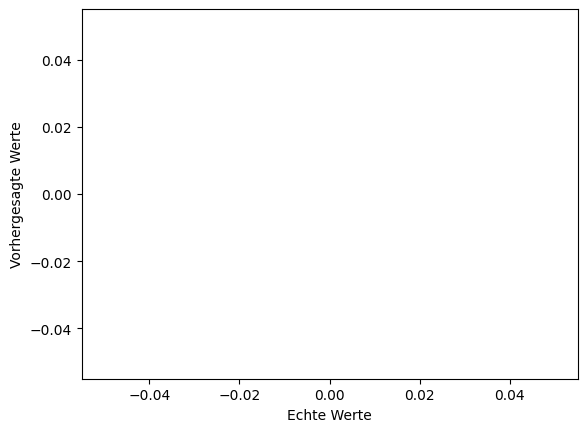

In [ ]:
# Vorhersagen auf Testdaten
y_pred = model.predict(X_test)


plt.scatter(y_test, y_pred.reshape(-1))
plt.xlabel("Ec
plt.ylabel("Vorhergesagte Werte")
plt.show()